In [81]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.tree import DecisionTreeClassifier
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_regression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import time

In [82]:
#Import and process the data
data = pd.read_csv('RavensData.csv') #I changed the name. You can find this file in the folder.

def convert_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(":"))
    return minutes * 60 + seconds

data['Time'] = data['Time'].apply(convert_to_seconds)
data.fillna(0, inplace=True)

#combines to go feature with down
data['Yards/Down'] = data['ToGo']/(5 - data['Down'])

#changes time to only account for halves instead of quarters
data.loc[data['Quarter'].isin([1, 3]), 'Time'] += 900

X = data.drop(['Result'], axis=1)
y = data['Result']

data

,Quarter,Time,Down,ToGo,Location,Relative Score,Result
0,1,739,1,10,51,0,1
1,1,706,2,4,57,0,1
2,1,667,1,10,65,0,1
3,1,629,2,10,65,0,2
4,1,586,1,10,77,0,1
...,...,...,...,...,...,...,...
774,4,367,4,7,31,35,3
775,4,170,1,10,4,35,1
776,4,129,2,8,6,35,1
777,4,120,3,8,6,35,1


Index(['Quarter', 'Time', 'Down', 'ToGo', 'Location', 'Relative Score'], dtype='object')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

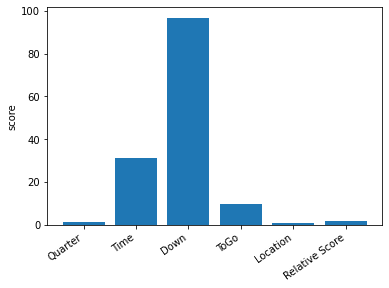

In [83]:
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)
plt.bar(x=X.columns,height=fit.scores_)
plt.ylabel('score')
plt.xticks(rotation=35, ha='right')

In [84]:
#MLP
"""
normal accuracies:
Before new feature
Train: ~55.38%
Test: 45.51%

After new feature
Train: ~55%
Test: ~46%

Training time: 15-60 seconds
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=[64], activation='logistic', solver='sgd',
                    alpha=0, batch_size=1, learning_rate_init=.01, shuffle=True,
                    momentum=0, n_iter_no_change=50, max_iter=1000)

start_time = time.time()
mlp.fit(X_train, y_train)
end_time = time.time()
training_time = end_time-start_time

score = mlp.score(X_test, y_test)
train_score = mlp.score(X_train, y_train)

# print(f"Num Iterations: {mlp.n_iter}")
print(f"Test Accuracy: {score * 100:.2f}%")
print(f"Train Accuracy: {train_score * 100:.2f}%")
print(f"Training Time: {training_time:.2f} seconds")
# print(mlp.predict_proba(X_test))

Test Accuracy: 40.38%
Train Accuracy: 42.38%
Training Time: 42.26 seconds


In [85]:
#Decision Tree
"""
Before new feature
normal accuracy: ~58.3%

After new feature
normal accuracy: ~63%

training time: 0.005 seconds

Does best with depth of 6
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = [8, 7, 6, 5, 4, 3, 2, 1]

for depth in depths:
  model = DecisionTreeClassifier(max_depth=depth)

  start_time = time.time()
  model.fit(X_train, y_train)
  end_time = time.time()
  training_time = end_time-start_time


  accuracy = model.score(X_test, y_test)
  print("Accuracy depth ", depth, ":", accuracy)
  print(f"Training Time: {training_time:.3f} seconds\n")



Accuracy depth  8 : 0.5897435897435898
Training Time: 0.007 seconds

Accuracy depth  7 : 0.5705128205128205
Training Time: 0.005 seconds

Accuracy depth  6 : 0.5769230769230769
Training Time: 0.003 seconds

Accuracy depth  5 : 0.5897435897435898
Training Time: 0.004 seconds

Accuracy depth  4 : 0.5833333333333334
Training Time: 0.000 seconds

Accuracy depth  3 : 0.5576923076923077
Training Time: 0.004 seconds

Accuracy depth  2 : 0.5256410256410257
Training Time: 0.003 seconds

Accuracy depth  1 : 0.4935897435897436
Training Time: 0.002 seconds



In [86]:
#KNN

"""
Before new feature
Train Accuracies: ~68%
Test accuracies: ~43%

After new feature
Train accuracies: ~70%
Test accuracies: ~47%
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print(f"Training set accuracy: {train_accuracy}")
print(f"Test set accuracy: {test_accuracy}")

probabilities = knn.predict_proba(X_test)
print("Output Probabilities for the test set:")
print(probabilities)

for p_value in [1, 2, 3, 4, 5]:
    knn = KNeighborsClassifier(p=p_value)
    start_time = time.time()
    knn.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time-start_time

    train_accuracy = knn.score(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)
    print(f"\nTraining set accuracy: {train_accuracy}")
    print(f"Test set accuracy: {test_accuracy}")
    print(f"Training Time: {training_time:.4f} seconds")



Training set accuracy: 0.6807339449541284
Test set accuracy: 0.4230769230769231
Output Probabilities for the test set:
[[0.6 0.4 0.  0.  0.  0. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [0.4 0.4 0.2 0.  0.  0. ]
 ...
 [0.4 0.6 0.  0.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]]

Training set accuracy: 0.7119266055045872
Test set accuracy: 0.43162393162393164
Training Time: 0.0029 seconds

Training set accuracy: 0.6807339449541284
Test set accuracy: 0.4230769230769231
Training Time: 0.0031 seconds

Training set accuracy: 0.6807339449541284
Test set accuracy: 0.41025641025641024
Training Time: 0.0031 seconds

Training set accuracy: 0.6752293577981652
Test set accuracy: 0.41025641025641024
Training Time: 0.0038 seconds

Training set accuracy: 0.673394495412844
Test set accuracy: 0.405982905982906
Training Time: 0.0018 seconds


In [87]:
#Random Forest
"""
Before new feature
normal accuracy depth>5: ~65%

After new feature
normal accuracy depth>5: ~68%
Best Accuracy: 74%

"""
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

depths = [8, 7, 6, 5, 4, 3, 2, 1]

for depth in depths:
    model = RandomForestClassifier(max_depth=depth)

    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    accuracy = model.score(X_test, y_test)
    print("Accuracy depth ", depth, ":", accuracy)
    print(f"Training Time: {training_time:.2f} seconds")
    


Accuracy depth  8 : 0.7307692307692307
Training Time: 0.23 seconds
Accuracy depth  7 : 0.7371794871794872
Training Time: 0.19 seconds
Accuracy depth  6 : 0.7115384615384616
Training Time: 0.19 seconds
Accuracy depth  5 : 0.7115384615384616
Training Time: 0.18 seconds
Accuracy depth  4 : 0.7243589743589743
Training Time: 0.15 seconds
Accuracy depth  3 : 0.6858974358974359
Training Time: 0.14 seconds
Accuracy depth  2 : 0.6410256410256411
Training Time: 0.13 seconds
Accuracy depth  1 : 0.5705128205128205
Training Time: 0.14 seconds


In [88]:
#Tensorflow/Keras MLP neural network
"""
Before new feature
normal accuracy: ~65%

AFter new feature
normal accuracy: ~66%

training time: 2.9 seconds

Data must be scaled
"""
X_train, X_test, y_train, y_test = train_test_split(X, y-1, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_classes = len(set(y_train))

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Assuming a binary classification task
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
model.fit(X_train_scaled, y_train, epochs=20)
end_time = time.time()
training_time = end_time - start_time

test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc}')
print(f"Training Time: {training_time:.2f} seconds")


Epoch 1/20
20/20 [==============================] - 1s 2ms/step - loss: 1.5017 - accuracy: 0.4815
Epoch 2/20
20/20 [==============================] - 0s 2ms/step - loss: 1.0556 - accuracy: 0.5377
Epoch 3/20
20/20 [==============================] - 0s 2ms/step - loss: 0.9112 - accuracy: 0.6035
Epoch 4/20
20/20 [==============================] - 0s 2ms/step - loss: 0.8519 - accuracy: 0.6132
Epoch 5/20
20/20 [==============================] - 0s 2ms/step - loss: 0.8081 - accuracy: 0.6212
Epoch 6/20
20/20 [==============================] - 0s 2ms/step - loss: 0.7769 - accuracy: 0.6421
Epoch 7/20
20/20 [==============================] - 0s 2ms/step - loss: 0.7509 - accuracy: 0.6629
Epoch 8/20
20/20 [==============================] - 0s 2ms/step - loss: 0.7280 - accuracy: 0.6565
Epoch 9/20
20/20 [==============================] - 0s 2ms/step - loss: 0.7104 - accuracy: 0.6774
Epoch 10/20
20/20 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.7030
Epoch 11/20
20/20 [

Text(0.5, 1.0, 'Model Comparison After')

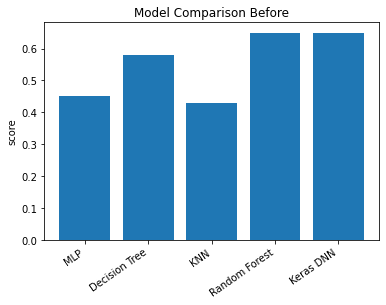

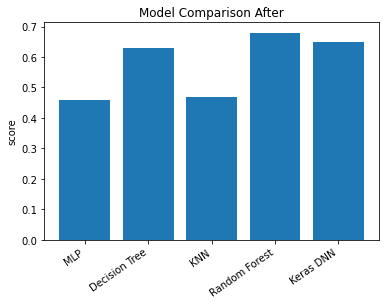

In [92]:
scores = np.array([0.45, 0.58, 0.43, 0.65, 0.65])
columns = np.array(['MLP', 'Decision Tree', 'KNN', 'Random Forest', 'Keras DNN'])
plt.bar(x=columns,height=scores)
plt.ylabel('score')
plt.xticks(rotation=35, ha='right')
plt.title('Model Comparison Before')

scores = np.array([0.46, 0.63, 0.47, 0.68, 0.65])
columns = np.array(['MLP', 'Decision Tree', 'KNN', 'Random Forest', 'Keras DNN'])
plt.figure()
plt.bar(x=columns,height=scores)
plt.ylabel('score')
plt.xticks(rotation=35, ha='right')
plt.title('Model Comparison After')

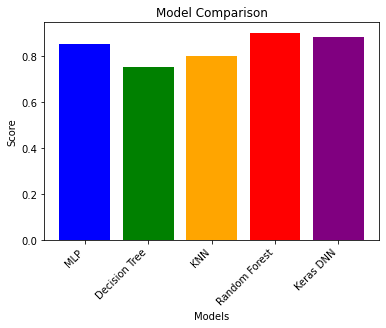

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have an array 'scores' containing the scores for each model
test_scores = np.array([0.85, 0.75, 0.80, 0.90, 0.88])

# Assuming you have an array 'columns' containing the names of the models
columns = np.array(['MLP', 'Decision Tree', 'KNN', 'Random Forest', 'Keras DNN'])

# Create a bar chart
plt.bar(x=columns, height=test_scores, color=['blue', 'green', 'orange', 'red', 'purple'])

# Add labels and title
plt.ylabel('Score')
plt.xlabel('Models')
plt.title('Model Comparison')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()